In [63]:
import matplotlib.pyplot as plt
import numpy as np

class Trapezoid:

    def __init__(self,f):
        self.f = f
        pass

    def fit(self,a,b,n):
        self.n = n
        if a!=b:
            if a<b:
                self.a = a
                self.b = b
            elif b<a:
                print(f"It should be {a}<{b}... considering the interval as [{b},{a}].")
                self.a,self.b = b,a
            h = (self.b-self.a)/self.n
            sum = 0
            for j in range(1,self.n):
                sum += self.f(self.a+j*h)
            self.aprox = (self.b-self.a)*(self.f(self.a)+2*sum+self.f(self.b))/(2*self.n)    
        else:
            self.aprox = 0
        return self.aprox

    def plot(self):
        x_axis = np.linspace(self.a,self.b,100)
        division = np.linspace(self.a,self.b,self.n+1)
        plt.figure(dpi=100)
        plt.plot(x_axis,[self.f(x) for x in x_axis])
        plt.plot(x_axis,[0 for x in x_axis],color='gray')
        plt.plot(division,[self.f(x) for x in division])
        for x in division:
            plt.plot([x,x],[0,f(x)],color='gray')
        plt.show()

    def get_errors(self,dx2_prom,real_value=None,silent=False):
        self.aprox_error = -dx2_prom*(self.b-self.a)**3/(12*self.n**2)
        if not silent:
            print(f"Error aproximado: {self.aprox_error}")
        if real_value is not None:
            self.real_error = (real_value - self.aprox)/real_value
            if not silent:
                print(f"Error relativo: {self.real_error}")
        

Error aproximado: 0.025600000000000005
Error relativo: 0.015537901401550059


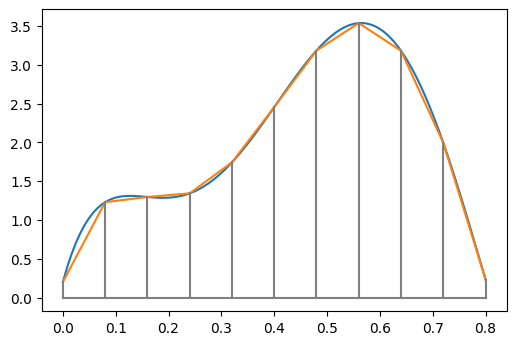

Valor real 1.640533
Valor aproximado 1.615042560000011


In [64]:
a, b = 0, 0.8
real_value = 1.640533
n = 10

def f(x):
    return 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

trap = Trapezoid(f)

aproximacion = trap.fit(a,b,n=n)
trap.get_errors(dx2_prom=-60,real_value=real_value,silent=False)
trap.plot()

print(f"Valor real {real_value}")
print(f"Valor aproximado {aproximacion}")

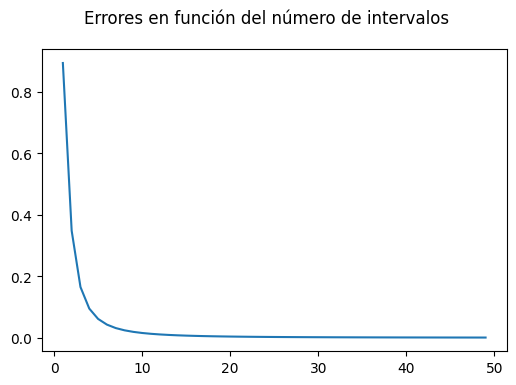

In [70]:
a, b = 0, 0.8
real_value = 1.640533
ns = list(range(1,50))

def f(x):
    return 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

trap = Trapezoid(f)

errores = []

for k in ns:
    trap = Trapezoid(f)
    trap.fit(a,b,n=k)
    trap.get_errors(dx2_prom=-60,real_value=real_value,silent=True)
    errores.append(trap.real_error)

plt.figure(dpi=100)
plt.suptitle("Errores en función del número de intervalos")
plt.plot(ns,errores)
plt.show()